# Final step: analyze variation of fermentation products with variation in diet. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import PercentFormatter
import scipy

import json
import os

capsize=6
#set colorscheme
colorNHANES='#222255'
colorav='k'
colorrefdiet='purple'
colorHadza='#225522' #dark yellow

colorMouse='#555555' #gray

colorBK='#663333' #color for Burkitt data
colorBK2='gray' #color for Burkitt data
colorlistferm=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']

alphahis=0.6 #transparancy histograms

labelenergybac="energy supply via bacteria (kcal)"
labelenergybacfrac="enery supply via bacteria (%)"
labelenergybacfracnounit="energy supply via bacteria"



#dict to save major characteristics of British reference diet
#load file if already exists, otherwise start with empty dict
try:
    with open('data_analysisresults/BRD_characteristics.json', 'r') as fp:
        BRD = json.load(fp)
except:
    BRD={}
print(BRD)
import FPcalc #basic calculations of 

#results analysis mice
#load file if already exists, otherwise start with empty dict
try:
    with open('data_analysisresults/mouse_characteristics.json', 'r') as fp:
        MOUSE = json.load(fp)
except:
    MOUSE={}
print(MOUSE)


####################
#set which json file with yield/excretion data to use
###################

#############################
#yield data to use as standard
dict_yielddata="data_analysisresults/average_excretion/selectedsamples_HMP_2019_ibdmdb_disease_healthy_age_adultsenior_NW_no_genus.json"
#############################

####dict for diet data
diet_analysis_results={}


{'energy': 2275.0, 'carbohydrates': 276.75, 'sugars': 59.0, 'proteins': 72.05000000000001, 'fat': 105.5, 'fiber': 19.9, 'fiber_low': 14.599999999999998, 'fiber_high': 25.2, 'carbLI_standard': 35.670500000000004, 'carbLI_higher': 44.6025, 'carbLI_lower': 25.755000000000003, 'carbLI_error': 9.423749999999998, 'bacwetweight': 117.72413793103448, 'fecalwetmass': 117.72413793103448, 'fecaldrymass': 29.58620689655172, 'fecaldrymassstd': 6.845624030794191, 'fecealfractionbac': 0.546888888888889, 'bacterialdrymass_feces': 16.180367816091955, 'energybacteria_fromfeces': 101.71752675768855, 'FP_fromfeces': 467.3659285620218, 'FP_fromfeces_g': [8.035607499560594, 2.7046488116402316, 6.192333401520376, 9.51608312429447, 1.6695716933854843, 4.741614607512687], 'FP_fromfeces_gsum': 32.859859137913844, 'energyfrac_fromfeces': 0.04471100077261035, 'energybacteria_fromfeces_error': 23.53528953407475, 'energyfrac_fromfeces_error': 0.01034518221278011, 'FP_fromfeces_error': 108.13861482566425, 'bacterial

# NHANES and distribution in the US

In [2]:
#read in data from NHANES
#https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Dietary
#newest data from NHANES 2018, available since June 2020
#N2018=pd.read_sas("DR1IFF_J2.XPT.txt",format='xport')
#display(N2018.shape)
N2017=pd.read_sas("data/DR1IFF_J.XPT",format='xport')
display(N2017.shape)
display(N2017.columns)

(112683, 84)

Index(['SEQN', 'WTDRD1', 'WTDR2D', 'DR1ILINE', 'DR1DRSTZ', 'DR1EXMER', 'DRABF',
       'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1CCMNM', 'DR1CCMTX',
       'DR1_020', 'DR1_030Z', 'DR1FS', 'DR1_040Z', 'DR1IFDCD', 'DR1IGRMS',
       'DR1IKCAL', 'DR1IPROT', 'DR1ICARB', 'DR1ISUGR', 'DR1IFIBE', 'DR1ITFAT',
       'DR1ISFAT', 'DR1IMFAT', 'DR1IPFAT', 'DR1ICHOL', 'DR1IATOC', 'DR1IATOA',
       'DR1IRET', 'DR1IVARA', 'DR1IACAR', 'DR1IBCAR', 'DR1ICRYP', 'DR1ILYCO',
       'DR1ILZ', 'DR1IVB1', 'DR1IVB2', 'DR1INIAC', 'DR1IVB6', 'DR1IFOLA',
       'DR1IFA', 'DR1IFF', 'DR1IFDFE', 'DR1ICHL', 'DR1IVB12', 'DR1IB12A',
       'DR1IVC', 'DR1IVD', 'DR1IVK', 'DR1ICALC', 'DR1IPHOS', 'DR1IMAGN',
       'DR1IIRON', 'DR1IZINC', 'DR1ICOPP', 'DR1ISODI', 'DR1IPOTA', 'DR1ISELE',
       'DR1ICAFF', 'DR1ITHEO', 'DR1IALCO', 'DR1IMOIS', 'DR1IS040', 'DR1IS060',
       'DR1IS080', 'DR1IS100', 'DR1IS120', 'DR1IS140', 'DR1IS160', 'DR1IS180',
       'DR1IM161', 'DR1IM181', 'DR1IM201', 'DR1IM221', 'DR1IP182', 'DR1IP183',

### Looking at age distribution of participants

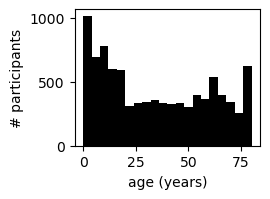

In [3]:
#looking at demographic data

N2017demo=pd.read_sas("data/DEMO_J.XPT",format='xport')

fig, axs = plt.subplots(1,1, figsize=(2.8,1*2.1))
axs=[axs]
axs[0].hist(N2017demo['RIDAGEYR'],bins=20,density=False,label='NHANES 2017/18',color='k')
axs[0].set_xlabel('age (years)')
axs[0].set_ylabel('# participants')
fig.tight_layout()


fig.savefig("plot_output_figure4/NHANES_age_distribution.pdf")

#Respondent sequence number

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,93704.0,1.062282e+06,1.071757e+06,91.0,13.0,637.0,26.0,26.0,91.0,26.0,...,13.682,0.392,0.029,11.087,1.054,3.100000e-02,0.079,0.080,0.027,1.500000e-01
1,93705.0,1.221545e+05,9.588665e+04,153.0,17.0,1241.0,34.0,34.0,85.0,17.0,...,16.047,0.101,0.014,17.805,1.943,9.175929e-78,0.014,0.001,0.001,1.000000e-03
2,93706.0,5.171106e+04,4.318084e-78,36.0,8.0,688.0,16.0,8.0,0.0,48.0,...,41.577,0.524,0.011,44.097,5.074,1.600000e-02,0.308,0.021,0.044,2.100000e-02
3,93707.0,2.453404e+05,3.633131e+05,136.0,16.0,1296.0,32.0,32.0,224.0,32.0,...,32.089,0.284,0.046,11.221,0.873,2.000000e-03,0.237,0.008,0.015,5.800000e-02
4,93708.0,1.515576e+05,3.147460e+05,105.0,14.0,1022.0,28.0,28.0,574.0,98.0,...,28.177,0.310,0.003,13.927,0.804,7.556647e-78,0.038,0.001,0.004,7.556647e-78


(7640, 84)

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93704.0,1.062282e+06,1.071757e+06,91.0,13.0,637.0,26.0,26.0,91.0,26.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
1,93705.0,1.221545e+05,9.588665e+04,153.0,17.0,1241.0,34.0,34.0,85.0,17.0,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
2,93706.0,5.171106e+04,4.318084e-78,36.0,8.0,688.0,16.0,8.0,0.0,48.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
3,93707.0,2.453404e+05,3.633131e+05,136.0,16.0,1296.0,32.0,32.0,224.0,32.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88
4,93708.0,1.515576e+05,3.147460e+05,105.0,14.0,1022.0,28.0,28.0,574.0,98.0,...,1.0,1.0,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63


(7640, 129)

carbohydrates reaching large intestine (mean)
24.62119301835056
carbohydrates reaching large intestine BRD as comparison
35.670500000000004
 5 percentile energy  US population  (in kJ)
90.66546679596102
 5 percentile energy fraction US population
1.689854378338132
mean FP - US


453.7185203183944

 5 and 95 percentile energy  US population, mean  (fermentation producct)
99.56609695676526
614.4740683297754
313.1745073592913
FP from carbohydrates fermBE standard NHANES (mean and median)
313.1745073592913
286.580220355239
plot_output_figure4/nutrient_distribution_NHANES0.5_variation_efficiency.pdf


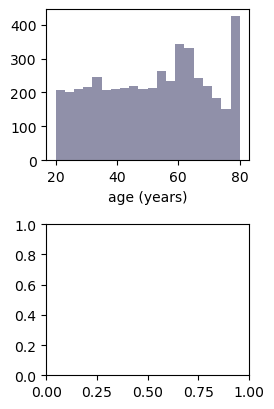

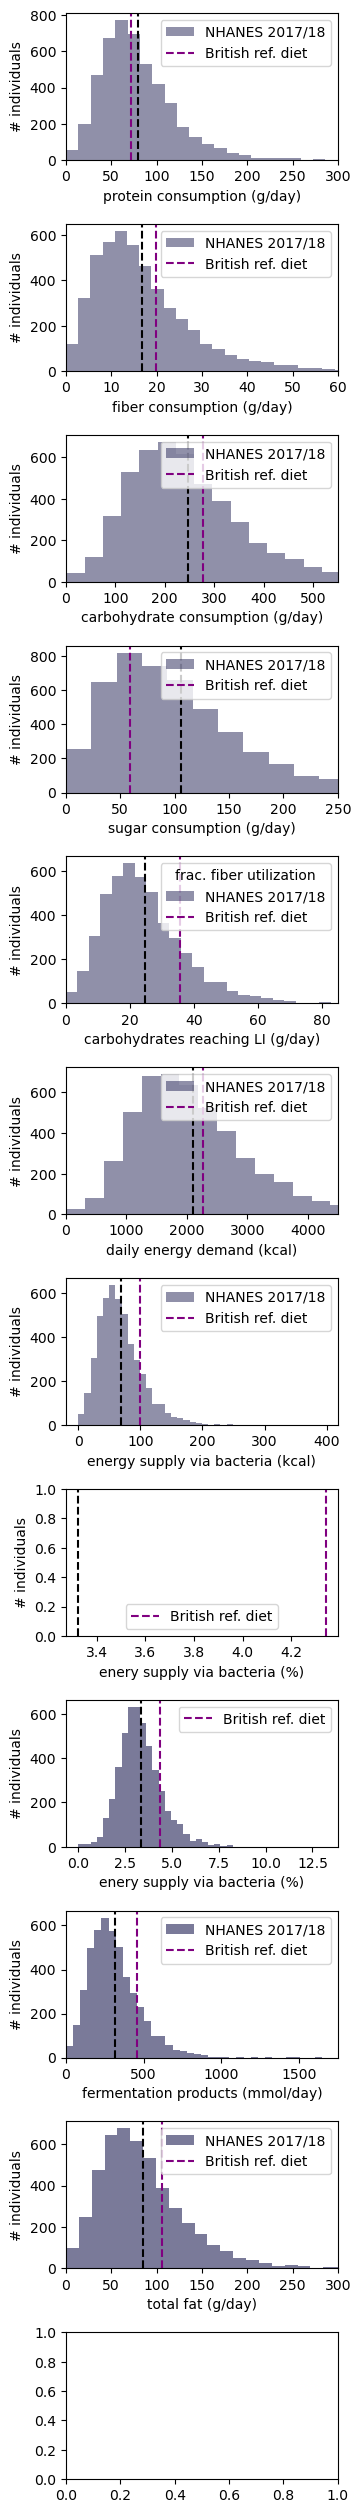

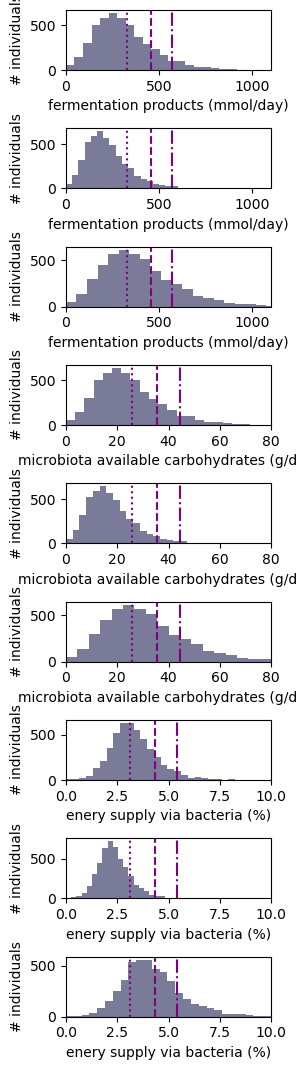

In [4]:



densitychoice=False
ylabelhis="# individuals"
#plot a few examples

perin=N2017.groupby('SEQN', as_index=False).sum()
display(perin.head())
display(perin.shape) 
#display(N2017demo.head()) 

colorh=colorNHANES
perin=perin.merge(N2017demo,on="SEQN",how='left')
display(perin.head())
display(perin.shape)


if 3>2:
    #fiberdigestion in [.5]:
    fiberdigestion=.5
    ####
    #select which individuals to look at 
    #only look at adjults
    ####
    perin=perin.query('RIDAGEYR >= 20') #here all above age 20

    #plot distribution of ages
    fig, axs = plt.subplots(2,1, figsize=(2.8,2*2.1))
    axs[0].hist(perin['RIDAGEYR'],bins=20,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[0].set_xlabel('age (years)')
    plt.savefig(os.path.join("plot_output_figure4","NHANES_age_distribution.pdf"))
    plt.tight_layout()

    ####
    #plot major characteristics of diet
    ####

    fig, axs = plt.subplots(12,1, figsize=(3.8,12*2.1))
    c=-1

    #plot histogram of proteins
    c=c+1
    axs[c].hist(perin['DR1IPROT'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("protein consumption (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1IPROT'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,300)
    axs[c].axvline(BRD["proteins"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    #plot histogram of fiber
    c=c+1
    axs[c].hist(perin['DR1IFIBE'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("fiber consumption (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1IFIBE'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,60)
    axs[c].axvline(BRD["fiber"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    c=c+1
    #plot histogram of total carbohydrates
    axs[c].hist(perin['DR1ICARB'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("carbohydrate consumption (g/day)")
    axs[c].axvline(perin['DR1ICARB'].mean(),ls='--',color=colorav)
    axs[c].set_ylabel(ylabelhis)
    axs[c].set_xlim(0,550)
    axs[c].axvline(BRD["carbohydrates"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    c=c+1
    #plot histogram of sugars
    axs[c].hist(perin['DR1ISUGR'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("sugar consumption (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1ISUGR'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,250)
    axs[c].axvline(BRD["sugars"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    #estimate carbon reaching LI
    c=c+1

    ######
    #calculate carbohydrates which is available for bacterial digestion
    ######

    perin["carbLI_higher"]=FPcalc.estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.75,starchpassage=0.15)
    #lower estimations
    perin["carbLI_standard"]=FPcalc.estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.5,starchpassage=0.13)
    perin["carbLI_lower"]=FPcalc.estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.3,starchpassage=0.10)
    
    axs[c].hist(perin['carbLI_standard'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    #axs[c].hist(perin['carbLI_higher'],bins=40,density=densitychoice,label='NHANES 2017/18',color="gray",alpha=0.5)
    
    axs[c].set_xlabel("carbohydrates reaching LI (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].set_xlim(0,85)
    axs[c].axvline(perin['carbLI_standard'].mean(),ls='--',color=colorav)
    axs[c].axvline(BRD["carbLI_standard"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend(title='frac. fiber utilization')

    
    print("carbohydrates reaching large intestine (mean)")
    print(perin['carbLI_standard'].mean())
    print("carbohydrates reaching large intestine BRD as comparison")
    print(BRD["carbLI_standard"])
    c=c+1
    #plot histogram of calories
    axs[c].hist(perin['DR1IKCAL'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("daily energy demand (kcal)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1IKCAL'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,4500)
    axs[c].axvline(BRD["energy"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()


   
    
    c=c+1
    
    #calculate different energy contributions etc
    perin["energyBE_standard"],perin["fermBE_standard"]=FPcalc.energycalc_array(perin['carbLI_standard'].to_numpy(),scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)
    perin["energyBE_lower"],perin["fermBE_lower"]=FPcalc.energycalc_array(perin['carbLI_lower'].to_numpy(),scenario='scenario1',calctype='from_carbs',dict_yielddata=dict_yielddata)
    perin["energyBE_higher"],perin["fermBE_higher"]=FPcalc.energycalc_array(perin['carbLI_higher'].to_numpy(),scenario='scenario2',calctype='from_carbs',dict_yielddata=dict_yielddata)
    #perin["energyBE_3"],perin["fermBE_3"]=FPcalc.energycalc_array(perin['carbLI075'].to_numpy(),scenario='scenario3',calctype='from_carbs')

    axs[c].hist(perin['energyBE_standard'],bins=40,density=False,label='NHANES 2017/18',color=colorNHANES,alpha=0.5)
    axs[c].axvline(perin['energyBE_standard'].mean(),ls='--',color=colorav)
    axs[c].axvline(BRD["energy_fromcarbs_standard"],ls='--',color=colorrefdiet,label='British ref. diet')

    print(" 5 percentile energy  US population  (in kJ)")
    print(np.quantile(perin["energyBE_standard"],0.05)*4.184)
    
    axs[c].set_xlabel(labelenergybac)
    axs[c].set_ylabel(ylabelhis)
    perin["energyfracBE_standard"]=perin['energyBE_standard']/perin['DR1IKCAL']*100
    perin["energyfracBE_higher"]=perin['energyBE_higher']/perin['DR1IKCAL']*100
    perin["energyfracBE_lower"]=perin['energyBE_lower']/perin['DR1IKCAL']*100
    #perin["energyfracBE_3"]=perin['energyBE_3']/perin['DR1IKCAL']*100

    axs[c].legend()

    c=c+1
    #axs[c].hist(perin["energyfracBE_3"],bins=40,density=False,label='sc3',color=colorNHANES,alpha=0.5,zorder=-1)
    axs[c].set_xlabel(labelenergybacfrac)
    axs[c].set_ylabel(ylabelhis)

    axs[c].axvline(perin['energyfracBE_standard'].mean(),ls='--',color=colorav)
    axs[c].axvline(BRD["energyfrac_fromcarbs_standard"]*100,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    c=c+1
    #plot histogram of energy contribution
    axs[c].hist(perin["energyfracBE_standard"],bins=40,density=False,color=colorh,alpha=alphahis)
    axs[c].set_xlabel(labelenergybacfrac)
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['energyfracBE_standard'].mean(),ls='--',color=colorav)
    axs[c].axvline(BRD["energyfrac_fromcarbs_standard"]*100,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()
    
    print(" 5 percentile energy fraction US population")
    print(np.quantile(perin["energyfracBE_standard"],0.05))

    
    
    ###plot fermentation products #mix of both strains
    c=c+1
    #plot histogram of energy contribution
    axs[c].hist(perin["fermBE_standard"],bins=40,density=False,label='NHANES 2017/18',color=colorh,alpha=alphahis) #colorNHANES
    #axs[c].hist(perin["fermBE_higher"],bins=40,density=False,label='NHANES 2017/18',color='gray',alpha=0.5) #colorNHANES
    axs[c].set_xlabel("fermentation products (mmol/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['fermBE_standard'].mean(),ls='--',color=colorav)
    #axs[c].axvline(perin['fermBE_standard'].mean(),ls='--',color=colorav)
    print("mean FP - US")
#    print(perin['fermBE_standard'].mean())
    axs[c].axvline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs_standard"])/2.,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].set_xlim(0,1750)
    axs[c].legend()

    display(BRD["FP_fromcarbs_standard"])
    
    
    print(" 5 and 95 percentile energy  US population, mean  (fermentation producct)")
    print(np.quantile(perin["fermBE_standard"],0.05))
    print(np.quantile(perin["fermBE_standard"],0.95))
    print(perin["fermBE_standard"].mean())

    
    ###fat
    c=c+1
    #plot histogram of energy contribution
    axs[c].hist(perin["DR1ITFAT"],bins=40,density=False,label='NHANES 2017/18',color=colorh,alpha=alphahis) #colorNHANES
    #axs[c].hist(perin["energyfracBE"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
    axs[c].set_xlabel("total fat (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1ITFAT'].mean(),ls='--',color=colorav)
    #axs[c].axvline(perin['fermBE'].mean(),ls='--',color=colorav)
    axs[c].axvline((BRD["fat"]),ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].set_xlim(0,300)
    axs[c].legend()

#DR1IPROT
    
    #calculate energy contribution
    #perin['fractionenergy']/(perin['DR1IKCAL']*0.00419)
    plt.tight_layout()
    plt.savefig("plot_output_figure4/nutrient_distribution_NHANES"+str(fiberdigestion)+".pdf")

fig, axs = plt.subplots(9,1, figsize=(3.,9*1.2))

axs[0].hist(perin["fermBE_standard"],bins=40,density=False,label='standard',color=colorh,alpha=alphahis)
axs[1].hist(perin["fermBE_lower"],bins=40,density=False,label='lower',color=colorh,alpha=alphahis)
axs[2].hist(perin["fermBE_higher"],bins=40,density=False,label='higher',color=colorh,alpha=alphahis)
for c in [0,1,2]:
    axs[c].set_xlabel("fermentation products (mmol/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].set_xlim(0,1100)
    axs[c].axvline(BRD["FP_fromcarbs_standard"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].axvline(BRD["FP_fromcarbs_higher"],ls='-.',color=colorrefdiet,label='British ref. diet, higher est.')
    axs[c].axvline(BRD["FP_fromcarbs_lower"],ls=':',color=colorrefdiet,label='British ref. diet, lower est.')
    

print("FP from carbohydrates fermBE standard NHANES (mean and median)")
print(np.mean(perin["fermBE_standard"]))
print(np.quantile(perin["fermBE_standard"],0.5))


axs[3].hist(perin["carbLI_standard"],bins=40,density=False,label='standard',color=colorh,alpha=alphahis)
axs[4].hist(perin["carbLI_lower"],bins=40,density=False,label='lower',color=colorh,alpha=alphahis)
axs[5].hist(perin["carbLI_higher"],bins=40,density=False,label='higher',color=colorh,alpha=alphahis)
for c in [3,4,5]:
    axs[c].set_xlabel("microbiota available carbohydrates (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].set_xlim(0,80)
    axs[c].axvline(BRD["carbLI_standard"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].axvline(BRD["carbLI_higher"],ls='-.',color=colorrefdiet,label='British ref. diet, higher est.')
    axs[c].axvline(BRD["carbLI_lower"],ls=':',color=colorrefdiet,label='British ref. diet, lower est.')
    
    
axs[6].hist(perin["energyfracBE_standard"],bins=40,density=False,label='standard',color=colorh,alpha=alphahis)
axs[7].hist(perin["energyfracBE_lower"],bins=40,density=False,label='lower',color=colorh,alpha=alphahis)
axs[8].hist(perin["energyfracBE_higher"],bins=40,density=False,label='higher',color=colorh,alpha=alphahis)

for c in [6,7,8]:
    axs[c].set_xlabel(labelenergybacfrac)
    axs[c].set_ylabel(ylabelhis)
    axs[c].set_xlim(0,10)
    axs[c].axvline(BRD["energyfrac_fromcarbs_standard"]*100,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].axvline(BRD["energyfrac_fromcarbs_lower"]*100,ls=':',color=colorrefdiet,label='British ref. diet, lower est.')
    axs[c].axvline(BRD["energyfrac_fromcarbs_higher"]*100,ls='-.',color=colorrefdiet,label='British ref. diet, higher est.')
    

    
    #axs[c].legend()


plt.tight_layout()
nameout="plot_output_figure4/nutrient_distribution_NHANES"+str(fiberdigestion)+"_variation_efficiency.pdf"
print(nameout)
plt.savefig(nameout)



## fermentation products and possible contribution of proteins

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,93704.0,1.062282e+06,1.071757e+06,91.0,13.0,637.0,26.0,26.0,91.0,26.0,...,13.682,0.392,0.029,11.087,1.054,3.100000e-02,0.079,0.080,0.027,1.500000e-01
1,93705.0,1.221545e+05,9.588665e+04,153.0,17.0,1241.0,34.0,34.0,85.0,17.0,...,16.047,0.101,0.014,17.805,1.943,9.175929e-78,0.014,0.001,0.001,1.000000e-03
2,93706.0,5.171106e+04,4.318084e-78,36.0,8.0,688.0,16.0,8.0,0.0,48.0,...,41.577,0.524,0.011,44.097,5.074,1.600000e-02,0.308,0.021,0.044,2.100000e-02
3,93707.0,2.453404e+05,3.633131e+05,136.0,16.0,1296.0,32.0,32.0,224.0,32.0,...,32.089,0.284,0.046,11.221,0.873,2.000000e-03,0.237,0.008,0.015,5.800000e-02
4,93708.0,1.515576e+05,3.147460e+05,105.0,14.0,1022.0,28.0,28.0,574.0,98.0,...,28.177,0.310,0.003,13.927,0.804,7.556647e-78,0.038,0.001,0.004,7.556647e-78


(7640, 84)

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93704.0,1.062282e+06,1.071757e+06,91.0,13.0,637.0,26.0,26.0,91.0,26.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
1,93705.0,1.221545e+05,9.588665e+04,153.0,17.0,1241.0,34.0,34.0,85.0,17.0,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
2,93706.0,5.171106e+04,4.318084e-78,36.0,8.0,688.0,16.0,8.0,0.0,48.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
3,93707.0,2.453404e+05,3.633131e+05,136.0,16.0,1296.0,32.0,32.0,224.0,32.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88
4,93708.0,1.515576e+05,3.147460e+05,105.0,14.0,1022.0,28.0,28.0,574.0,98.0,...,1.0,1.0,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63


(7640, 129)

carbohydrates reaching large intestine (mean)
24.62119301835056
carbohydrates reaching large intestine BRD as comparison
35.670500000000004
 5 percentile energy  US population  (in kJ)
90.66546679596102
 95 percentile energy  US population  (in kJ)
559.5436593575025
mean FP - US
313.1745073592913
 5 and 95 percentile energy  US population, mean  (fermentation producct)
99.56609695676526
614.4740683297754
313.1745073592913


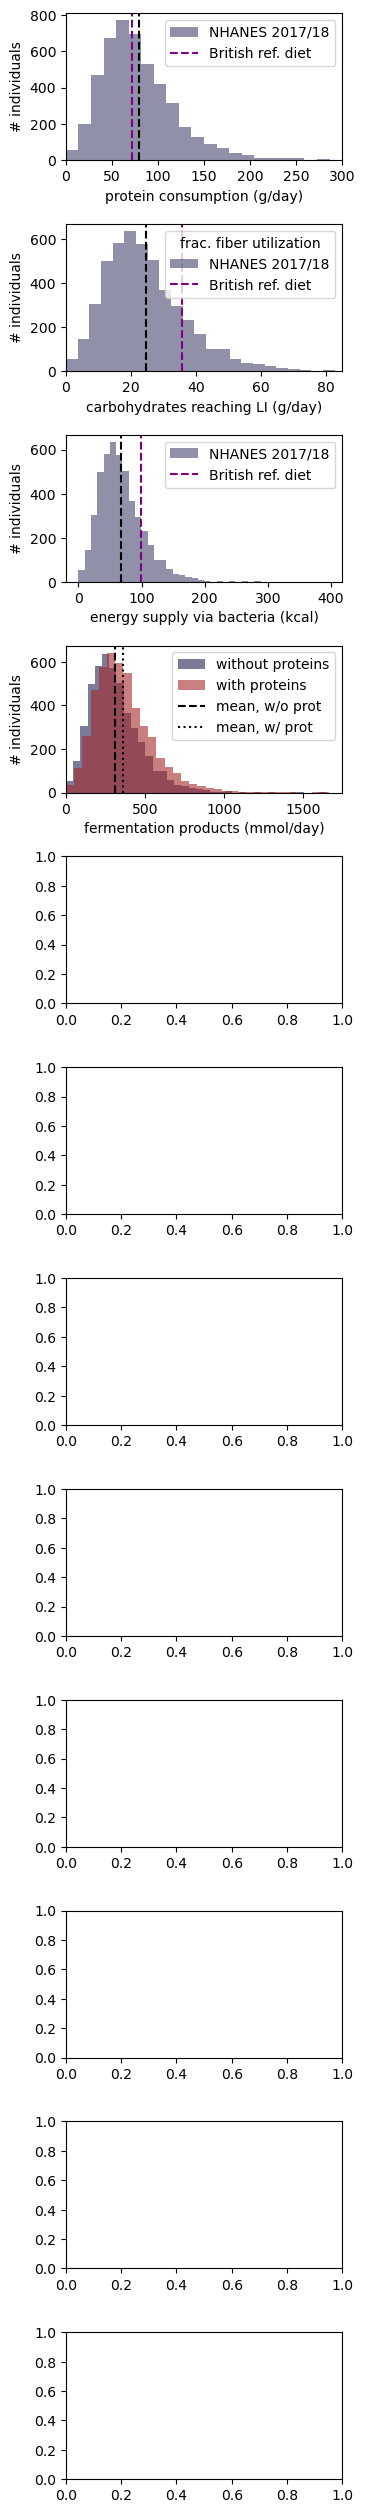

In [47]:
densitychoice=False
ylabelhis="# individuals"
#plot a few examples

perin=N2017.groupby('SEQN', as_index=False).sum()
display(perin.head())
display(perin.shape) 
#display(N2017demo.head()) 

colorh=colorNHANES
perin=perin.merge(N2017demo,on="SEQN",how='left')
display(perin.head())
display(perin.shape)


if 3>2:
    #fiberdigestion in [.5]:
    fiberdigestion=.5
    ####
    #select which individuals to look at 
    #only look at adjults
    ####
    perin=perin.query('RIDAGEYR >= 20') #here all above age 20

    ####
    #plot major characteristics of diet
    ####

    fig, axs = plt.subplots(12,1, figsize=(3.8,12*2.1))
    c=-1

    #plot histogram of proteins
    c=c+1
    axs[c].hist(perin['DR1IPROT'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("protein consumption (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1IPROT'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,300)
    axs[c].axvline(BRD["proteins"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    #estimate carbon reaching LI
    c=c+1
    ######
    #calculate carbohydrates which is available for bacterial digestion
    ######

    perin["carbLI_higher"]=FPcalc.estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.75,starchpassage=0.15)
    #lower estimations
    perin["carbLI_standard"]=FPcalc.estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.5,starchpassage=0.13)
    perin["carbLI_lower"]=FPcalc.estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.3,starchpassage=0.10)
    
    axs[c].hist(perin['carbLI_standard'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    #axs[c].hist(perin['carbLI_higher'],bins=40,density=densitychoice,label='NHANES 2017/18',color="gray",alpha=0.5)
    
    axs[c].set_xlabel("carbohydrates reaching LI (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].set_xlim(0,85)
    axs[c].axvline(perin['carbLI_standard'].mean(),ls='--',color=colorav)
    axs[c].axvline(BRD["carbLI_standard"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend(title='frac. fiber utilization')

    
    print("carbohydrates reaching large intestine (mean)")
    print(perin['carbLI_standard'].mean())
    print("carbohydrates reaching large intestine BRD as comparison")
    print(BRD["carbLI_standard"])

    
    c=c+1
    
    #calculate different energy contributions etc
    perin["energyBE_standard"],perin["fermBE_standard"]=FPcalc.energycalc_array(perin['carbLI_standard'].to_numpy(),scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)
    perin["energyBE_lower"],perin["fermBE_lower"]=FPcalc.energycalc_array(perin['carbLI_lower'].to_numpy(),scenario='scenario1',calctype='from_carbs',dict_yielddata=dict_yielddata)
    perin["energyBE_higher"],perin["fermBE_higher"]=FPcalc.energycalc_array(perin['carbLI_higher'].to_numpy(),scenario='scenario2',calctype='from_carbs',dict_yielddata=dict_yielddata)
    #perin["energyBE_3"],perin["fermBE_3"]=FPcalc.energycalc_array(perin['carbLI075'].to_numpy(),scenario='scenario3',calctype='from_carbs')

    axs[c].hist(perin['energyBE_standard'],bins=40,density=False,label='NHANES 2017/18',color=colorNHANES,alpha=0.5)
    axs[c].axvline(perin['energyBE_standard'].mean(),ls='--',color=colorav)
    axs[c].axvline(BRD["energy_fromcarbs_standard"],ls='--',color=colorrefdiet,label='British ref. diet')

    print(" 5 percentile energy  US population  (in kJ)")
    print(np.quantile(perin["energyBE_standard"],0.05)*4.184)
    
    print(" 95 percentile energy  US population  (in kJ)")
    print(np.quantile(perin["energyBE_standard"],0.95)*4.184)

    axs[c].set_xlabel(labelenergybac)
    axs[c].set_ylabel(ylabelhis)
    perin["energyfracBE_standard"]=perin['energyBE_standard']/perin['DR1IKCAL']*100
    perin["energyfracBE_higher"]=perin['energyBE_higher']/perin['DR1IKCAL']*100
    perin["energyfracBE_lower"]=perin['energyBE_lower']/perin['DR1IKCAL']*100
    #perin["energyfracBE_3"]=perin['energyBE_3']/perin['DR1IKCAL']*100

    axs[c].legend()

  
    
    ###plot fermentation products #mix of both strains
    c=c+1
    #plot histogram of energy contribution
    axs[c].hist(perin["fermBE_standard"],bins=40,density=False,label='without proteins',color=colorh,alpha=alphahis) #colorNHANES

    #plot histogram with proteins
    #############################
    #add contribution from proteins
    #############################
    factor_FPperAA=1 #1 Assume 1 FP per amino acid (Stickland fermentation)
    molecular_weight_AA=0.110 #0.11g/mM AA #110g/mol AA
    ##########################
    #major assumption
    ###########################
    fraction_proteins_reachingLI=0.07

    perin["fermBE_standard_with_proteins"]=perin["fermBE_standard"]+factor_FPperAA*perin['DR1IPROT']*fraction_proteins_reachingLI/molecular_weight_AA
    
    axs[c].hist(perin["fermBE_standard_with_proteins"],bins=40,density=False,label='with proteins',color="brown",alpha=alphahis) #colorNHANES
    
    #axs[c].hist(perin["fermBE_higher"],bins=40,density=False,label='NHANES 2017/18',color='gray',alpha=0.5) #colorNHANES
    axs[c].set_xlabel("fermentation products (mmol/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['fermBE_standard'].mean(),ls='--',color=colorav,label='mean, w/o prot')
    axs[c].axvline(perin['fermBE_standard_with_proteins'].mean(),ls=':',color=colorav,label='mean, w/ prot')
    
    #axs[c].axvline(perin['fermBE_standard'].mean(),ls='--',color=colorav)
    print("mean FP - US")
    print(perin['fermBE_standard'].mean())
    #axs[c].axvline(BRD["FP_fromcarbs_standard"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].set_xlim(0,1750)
    axs[c].legend()

    
    
    print(" 5 and 95 percentile energy  US population, mean  (fermentation producct)")
    print(np.quantile(perin["fermBE_standard"],0.05))
    print(np.quantile(perin["fermBE_standard"],0.95))
    print(perin["fermBE_standard"].mean())

    #DR1IPROT
    #calculate energy contribution
    #perin['fractionenergy']/(perin['DR1IKCAL']*0.00419)
    plt.tight_layout()
    plt.savefig("plot_output_figure4/nutrient_distribution_NHANES"+str(fiberdigestion)+"_with_protein_included.pdf")



# Hadza

## Todo: For Fig. 2, prepare plot for total carbohydrates (sum fiber and carbohydrate)

In [5]:
hadzadiet=pd.read_excel("data/Hadza_diet_Pontzeretal_table2.xlsx")




hadzadiet_listfiberfraction=[]
if 3>2:
    fiberfraction=0.75
    hadzadiet["carbLI_standard"]=fiberfraction*hadzadiet['fiber']*0.5+0.13*(hadzadiet['carbohydrate']-0.57*hadzadiet['honey'])
    hadzadiet["carbLI_lower"]=fiberfraction*hadzadiet['fiber']*0.3+0.1*(hadzadiet['carbohydrate']-0.57*hadzadiet['honey'])
    hadzadiet["carbLI_higher"]=fiberfraction*hadzadiet['fiber']*0.75+0.15*(hadzadiet['carbohydrate']-0.57*hadzadiet['honey'])
    
    #calculate caolories
    #4 calories per gram, protein provides 4 calories per gram, and fat provides 9 calories per gram.
    #improve, use data from other study.....
    hadzadiet["kcal"]=hadzadiet['carbohydrate']*4+hadzadiet['protein']*4+hadzadiet['fat']*9
    display(hadzadiet)
    print(hadzadiet.mean())
    print(hadzadiet.max())
    print(hadzadiet.min())
  

    hadzadiet["energy_standard"],hadzadiet['fermentationprod_standard']=FPcalc.energycalc_array(hadzadiet["carbLI_standard"].to_numpy(),scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)
    hadzadiet["energy_lower"],hadzadiet['fermentationprod_lower']=FPcalc.energycalc_array(hadzadiet["carbLI_lower"].to_numpy(),scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)
    hadzadiet["energy_higher"],hadzadiet['fermentationprod_higher']=FPcalc.energycalc_array(hadzadiet["carbLI_higher"].to_numpy(),scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)

    hadzadiet["energyfrac_standard"]=hadzadiet['energy_standard']/hadzadiet["kcal"]*100
    hadzadiet["energyfrac_lower"]=hadzadiet['energy_lower']/hadzadiet["kcal"]*100
    hadzadiet["energyfrac_higher"]=hadzadiet['energy_higher']/hadzadiet["kcal"]*100

    
    #bar plot
    fig, axs = plt.subplots(8,1, figsize=(2.8,8*2.1))

    plt.savefig("plot_output_figure4/nutrient_distribution.pdf")
    plt.tight_layout()

    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    cc=0
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["energy_standard"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('energy contribution gut bacteria (kcal/day)')

    cc=1
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["energyfrac_standard"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('energy contribution gut bacteria (%)')


    cc=2
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["honey"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('honey consumption (g/day)')


    cc=3
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["fiber"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('fiber consumption (g/day)')


    cc=4
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["protein"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('protein consumption (g/day)')


    cc=5
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["carbLI_standard"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('carbohydr. reaching LI (g/day)')


    cc=6
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["carbohydrate"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('carbohydrate consumption (g/day)')

    cc=7
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["fat"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('fat consumption (g/day)')

    plt.savefig("plot_output_figure4/nutrient_distribution_Hadza"+str(fiberfraction)+".pdf")
    plt.tight_layout()
    #display(hadzadiet['energyfracBE075'].min())
    #display(hadzadiet['energyfracBE075'].max())
    hazav=hadzadiet['energyfrac_standard'].mean()
    hazstd=hadzadiet['energyfrac_standard'].std()

    #and now the intere thing as horizontal bar plots


    #bar plot
    fig, axs = plt.subplots(8,1, figsize=(2.8,8*1.5))

    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    cc=0
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["energy_standard"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title(labelenergybac)
    axs[cc].set_ylabel("energy (kcal/day)")
    axs[cc].axhline(BRD["energy_fromcarbs_standard"],color=colorrefdiet,ls='--')


    cc=1
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["energyfrac_standard"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title(labelenergybacfrac)
    axs[cc].set_ylabel("fraction (%)")
    axs[cc].axhline(BRD["energyfrac_fromcarbs_standard"]*100,color=colorrefdiet,ls='--')


    cc=2
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["honey"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('honey consumption')
    axs[cc].set_ylabel('(g/day)')
    #axs[cc].axhline(BRD["sugars"],color=colorrefdiet,ls='--')



    cc=3
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["fiber"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('fiber consumption')
    axs[cc].set_ylabel('(g/day)')
    axs[cc].axhline(BRD["fiber"],color=colorrefdiet,ls='--')








    cc=4
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["protein"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('protein consumption')
    axs[cc].set_ylabel('(g/day)')
    axs[cc].axhline(BRD["proteins"],color=colorrefdiet,ls='--')

    cc=5
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["carbLI_standard"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_ylabel('(g/day)')
    axs[cc].set_title('carbohydr. reaching LI')

    cc=6
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["carbohydrate"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('carbohydrate consumption')
    axs[cc].set_ylabel('(g/day)')
    axs[cc].axhline(BRD["carbohydrates"],color=colorrefdiet,ls='--')

    cc=7
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["fat"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))

    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title("fat consumption")
    axs[cc].set_ylabel('(g/day)')
    axs[cc].set_xlabel('monthly variation')
    axs[cc].axhline(BRD["fat"],color=colorrefdiet,ls='--')




    plt.tight_layout()
    plt.savefig("plot_output_figure4/nutrient_distribution_Hadza_horizontal.pdf")




    #bar plot
    fig, axs = plt.subplots(2,1, figsize=(3.8,3*1.5))
    cc=-1
    
    cc=cc+1
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet['fermentationprod_standard'], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fermentation prod. (mmol/day)")
    axs[cc].axhline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs_standard"])/2.,color=colorrefdiet,ls='--')

    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    axs[cc].set_xlabel('monthly variation')

    plt.savefig("plot_output_figure4/nutrient_distribution_Hadza_horizontal_fermonly.pdf")
    plt.tight_layout()



    

    ############
    #old other orientation
    #############
    #bar plot
    
    fig, axs = plt.subplots(12,1, figsize=(3.8,12*2.1))
    cc=-1
    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']


    cc=0
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["carbLI_standard"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    axs[cc].set_xlabel('carbohydr. reaching LI (g/day)')
    axs[cc].set_ylabel('monthly variation')

    
    print("carbohydrates reaching large intestine (mean, min, max)")
    print(hadzadiet["carbLI_standard"].mean())
    print(hadzadiet["carbLI_standard"].min())
    print(hadzadiet["carbLI_standard"].max())
    
    cc=cc+1
    #plot fermentation products
    axs[cc].barh(range(12,0,-1), hadzadiet['fermentationprod_standard'], align='center',color=colorHadza)
    print("max haza data fermentation products")
    print(hadzadiet['fermentationprod_standard'])
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    axs[cc].set_xlabel("fermentation prod. (mmol/day)")
    axs[cc].axvline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs_standard"])/2.,color=colorrefdiet,ls='--')
    axs[cc].set_ylabel('monthly variation')

    axs[cc].set_xlim(0,1750)
    fig.tight_layout()
    fig.savefig("plot_output_figure4/nutrient_distribution_Hadza_horizontal_energyonly.pdf")
    

    #######################
    ####plot different fiber digestion rates
    #######################
    [colorlower,colorc,colorhigher]=['#a1d99b','#005a32','#41ab5d']
    
    
    #bar plot
    fig, axs = plt.subplots(3,1, figsize=(2.5,1.5*3))
    cc=-1
    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    cc=cc+1
    #plot energy calculations
    axs[cc].bar(np.array(range(12,0,-1))+0.25, hadzadiet["carbLI_standard"],width=0.25, align='center',color=colorHadza,label='standard')
    axs[cc].bar(np.array(range(12,0,-1))+0., hadzadiet["carbLI_lower"],width=0.25, align='center',color=colorlower,label='lower')
    axs[cc].bar(np.array(range(12,0,-1))+0.5, hadzadiet["carbLI_higher"],width=0.25, align='center',color=colorhigher,label='higher')
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    
    
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title(labelenergybacfracnounit)
    axs[cc].set_ylabel("MAC (g/day)")
    axs[cc].axhline(BRD["carbLI_standard"],color=colorrefdiet,ls='--')
    axs[cc].axhline(BRD["carbLI_lower"],color=colorrefdiet,ls='-.')
    axs[cc].axhline(BRD["carbLI_higher"],color=colorrefdiet,ls=':')
    
    axs[cc].legend(title="fraction (%)")
    
    
    
    cc=cc+1
    #plot energy calculations
    axs[cc].bar(np.array(range(12,0,-1))+0.25, hadzadiet["energyfrac_standard"],width=0.25, align='center',color=colorHadza)
    axs[cc].bar(np.array(range(12,0,-1))+0., hadzadiet["energyfrac_lower"],width=0.25, align='center',color=colorlower)
    axs[cc].bar(np.array(range(12,0,-1))+0.5, hadzadiet["energyfrac_higher"],width=0.25, align='center',color=colorhigher)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fraction (%)")
    axs[cc].axhline(BRD["energyfrac_fromcarbs_standard"]*100,color=colorrefdiet,ls='--')
    axs[cc].axhline(BRD["energyfrac_fromcarbs_lower"]*100,color=colorrefdiet,ls='-.')
    axs[cc].axhline(BRD["energyfrac_fromcarbs_higher"]*100,color=colorrefdiet,ls=':')

    
    cc=cc+1
    #plot energy calculations
    axs[cc].bar(np.array(range(12,0,-1))+0.25, hadzadiet["fermentationprod_standard"],width=0.25, align='center',color=colorHadza)
    axs[cc].bar(np.array(range(12,0,-1))+0., hadzadiet["fermentationprod_lower"],width=0.25, align='center',color=colorlower)
    axs[cc].bar(np.array(range(12,0,-1))+0.5, hadzadiet["fermentationprod_higher"],width=0.25, align='center',color=colorhigher)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fermentation prod. (mmol/day)")
    axs[cc].axhline(BRD["FP_fromcarbs_standard"],color=colorrefdiet,ls='--')
    axs[cc].axhline(BRD["FP_fromcarbs_lower"],color=colorrefdiet,ls='-.')
    axs[cc].axhline(BRD["FP_fromcarbs_higher"],color=colorrefdiet,ls=':')

    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    axs[cc].set_xlabel('monthly variation')
    
    plt.savefig("plot_output_figure4/nutrient_distribution_Hadza_horizontal_energyonly_fiberdigestion.pdf")
    plt.tight_layout()

    #same plot again, only energy contribution

    display(hadzadiet['energyfrac_standard'].min())
    display(hadzadiet['energyfrac_standard'].max())
    hazav=hadzadiet['energyfrac_standard'].mean()
    hazstd=hadzadiet['energyfrac_standard'].std()
    print("add hazad")
    print(hadzadiet)
    hadzadiet_listfiberfraction.append(hadzadiet)
    
print(hadzadiet_listfiberfraction)


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

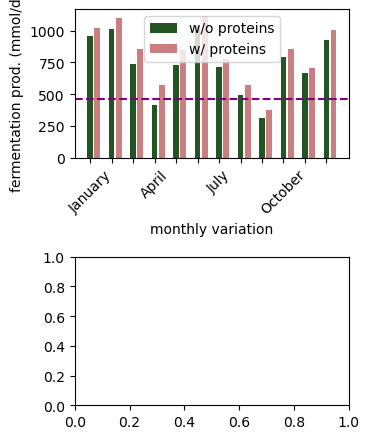

In [49]:
# add protein calculations Hadza

if 3>2:
    #bar plot
    fig, axs = plt.subplots(2,1, figsize=(3.8,3*1.5))
    cc=-1
    
    cc=cc+1
    #plot energy calculations
    
    hadzadiet['fermentationprod_protein']=factor_FPperAA*hadzadiet["protein"]*fraction_proteins_reachingLI/molecular_weight_AA
    axs[cc].bar(range(36,0,-3), hadzadiet['fermentationprod_standard'], align='center',color=colorHadza,label='w/o proteins')
    axs[cc].bar(range(37,1,-3), hadzadiet['fermentationprod_standard']+hadzadiet['fermentationprod_protein'], align='center',color='brown',label='w/ proteins',alpha=alphahis)
    
    
    axs[cc].set_xticks(range(3,37,3))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fermentation prod. (mmol/day)")
    axs[cc].axhline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs_standard"])/2.,color=colorrefdiet,ls='--')

    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    axs[cc].set_xlabel('monthly variation')
    
    axs[cc].legend()
    plt.savefig("plot_output_figure4/nutrient_distribution_Hadza_horizontal_fermonly_addproteins.pdf")
    plt.tight_layout()
    
    




# Fecal weight distribution and variation in energy contribution (based on Burkitt data)

## Todo: For Fig. 2b, c: plot histogram fecal dry weight, plot total FP vs amount (show corrected values only). 
- explain in Supplementary Fig. what is used here. S3A


,fecal weight,transit time
29,226.275276,12.928184
37,347.758954,14.254193
22,151.159341,14.751431
34,261.051171,15.414373
41,414.065111,16.740382


95 percentile energy  from Burkitt data (kJ)
1158.2388938801555
10041.6
Energy of British reference used in calculations
2275.0
95 percentile energy fraction from Burkitt data
12.168164371652928
467.3659285620218


/var/folders/kc/n6kw930x6kq64srbgvnpcrz40000gn/T/ipykernel_20043/302152344.py:63: RuntimeWarning: divide by zero encountered in divide
  return a +b/(x)


NameError: name 'lkj' is not defined

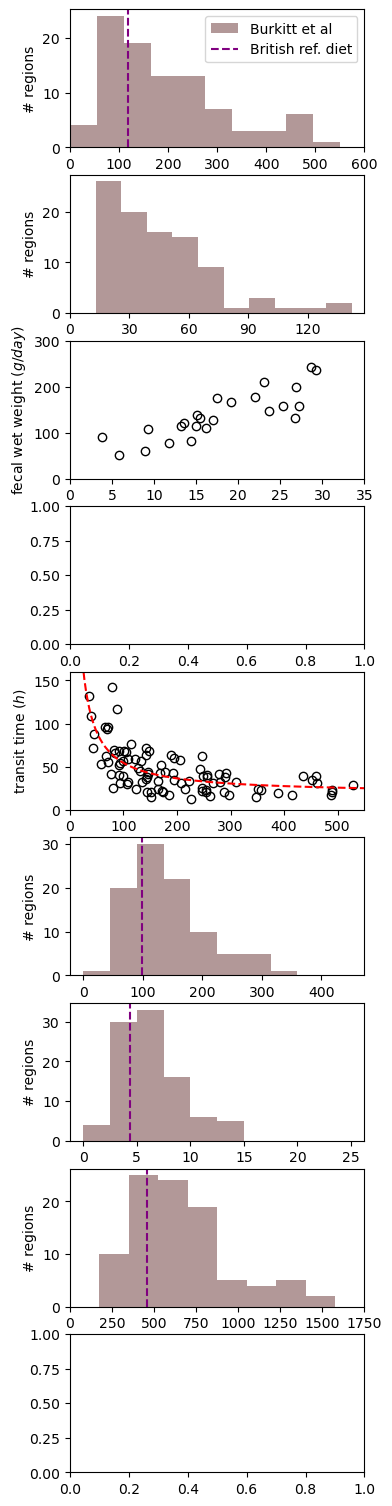

In [39]:


densitychoice=False
ylabelhis="# regions"

#load Burkitt data on fecal wet weight and transit time
Burkittdata=pd.read_csv('data/burkitt_data2.csv')
Burkittdata=Burkittdata.sort_values(by=['transit time'])
display(Burkittdata.head())

#load Cumings et al 1992 on variation in fiber consumption data
CumingsData=pd.read_csv('data/cumings1992_data.csv')
columns=['nonstarch','stoolweight','stoolweight2','ccr']
CumingsData.columns=columns
units=['g/day','g/day','g/day','100k/year age standardized']

#plot different histograms
fig, axs = plt.subplots(9,1, figsize=(3.8,19))

#distribution fecal weight
axs[0].hist(Burkittdata['fecal weight'],density=False,bins=10,label='Burkitt et al',range=(0,550),color=colorBK,alpha=0.5)
axs[0].axvline(BRD["fecalwetmass"],ls='--',color=colorrefdiet,label='British ref. diet')


axs[0].set_ylabel("# regions")
axs[0].set_xlabel("fecal wet weight(g/day)")
axs[0].legend()
axs[0].set_xlim(0,600)

#distribution transit time
axs[1].hist(Burkittdata['transit time'],density=False,bins=10,label='Burkitt et al',color=colorBK,alpha=0.5)
axs[1].set_ylabel("# regions")
axs[1].set_xlabel("transit time (h)")
axs[1].set_xticks([0,30,60,90,120])
#axs[1].legend()

#plot iber consumption vs stool bulk (Cummings data)
axs[2].set_xlabel("fiber consumption $(g/day)$")
axs[2].set_ylabel("fecal wet weight $(g/day)$")
axs[2].plot(CumingsData['nonstarch'],CumingsData['stoolweight'],color='k',ls='',marker='o',markeredgewidth=1,markeredgecolor='k',markerfacecolor='None',label='Cummings et al.')



#add fits to these correlations
xc=CumingsData['nonstarch']
yc=CumingsData['stoolweight']
fit1=np.polyfit(xc,yc,1)
xc=CumingsData['stoolweight2']/fit1[0]-fit1[1]/fit1[0]
xc=xc[:-1]
yc=CumingsData['ccr'][:-1]
#fit3=np.polyfit(xc,yc,3)
axs[2].set_xlim(0,35)
axs[2].set_ylim(0,300)


###look at transit time vs fecal weight
axs[4].plot(Burkittdata['fecal weight'],Burkittdata['transit time'],ls='',marker='o',markeredgewidth=1,markeredgecolor='k',markerfacecolor='None',label='Burkitt et al')
axs[4].set_xlabel("fecal wet weight $(g/day)$")
axs[4].set_ylabel("transit time $(h)$")
axs[4].set_xlim(0,550)
axs[4].set_ylim(0,160)

#fit non-linear function to data
def func2(x, a, b):
  return a +b/(x)
  #return a * np.log(b * x) + c
xc=Burkittdata['fecal weight']
yc=Burkittdata['transit time']
#print(xc)
#print(yc)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func2, xc, yc)
xcc=np.linspace(0,75,100)
#axs[2].plot(xcc, func(xcc, *popt), color='k', label="Fitted Curve")
#p0 = popt[:2]
popt, pcov = curve_fit(func2, xc, yc,method='trf')
xcc=np.linspace(0,600,200)
axs[4].plot(xcc, func2(xcc, *popt), color='r',ls='--', label="fiber-transit-stool model")
#axs[4].legend()

#estimate fp for standard assumption fecal wet to fecal dry mass
finalcalculationmode=3
energyBurkitfecalweight,fermBurkittfecalweight=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=finalcalculationmode)*0.548,scenario='reference',calctype='from_feces',dict_yielddata=dict_yielddata)

axs[5].hist(energyBurkitfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=.5,range=(0,450))
axs[5].axvline(BRD["energy_fromcarbs_standard"],ls='--',color=colorrefdiet,label='British ref. diet')

print("95 percentile energy  from Burkitt data (kJ)")
print(np.quantile(energyBurkitfecalweight,0.95)*4.184)
print(2400*4.184)


print("Energy of British reference used in calculations")
print(BRD["energy"])
axs[5].set_xlabel(labelenergybac)
axs[5].set_ylabel("# regions")

energyratioBurkitfecalweight=energyBurkitfecalweight/BRD["energy"] #assuming fixed rate
#energyratioBurkitfecalweight4=energyBurkitfecalweight4/BRD["energy"]
axs[6].hist(energyratioBurkitfecalweight*100,label="same bact. fraction as ref diet)",color=colorBK,alpha=0.5,range=(0,25))
axs[6].axvline(BRD["energyfrac_fromcarbs_standard"]*100,ls='--',label='British ref. diet',color=colorrefdiet)
axs[6].set_xlabel(labelenergybacfrac)
axs[6].set_ylabel("# regions")
print("95 percentile energy fraction from Burkitt data")
print(np.quantile(energyratioBurkitfecalweight*100,0.95))

#plot fermentation products
#axs[7].hist(fermBurkittfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=0.5)
axs[7].hist(fermBurkittfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=0.5,range=(0,1750))
axs[7].axvline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs_standard"])/2.,ls='--',color=colorrefdiet,label='British ref. diet')
axs[7].set_xlabel("fermentation products (mmol/day)")
axs[7].set_ylabel("# regions")
axs[7].set_xlim(0,1750)

print(BRD["FP_fromfeces"])

#(BRD["FP_fromfeces"]+BRD["FP_fromcarbs_standard"])/2.

diet_analysis_results["CV_BURKITT"]=fermBurkittfecalweight.std()/fermBurkittfecalweight.mean()
print(diet_analysis_results["CV_BURKITT"])
print("95 percentile fermentation product from Burkitt data")
print(np.quantile(fermBurkittfecalweight,0.95))

print("max fermentation from Burkitt data")
print(np.nanmax(fermBurkittfecalweight))

fig.tight_layout()
fig.savefig("plot_output_figure4/fecalconsiderations_Burkitt.pdf")


# Comparison different relations between fecal wet weight and dry weight

To estimate bacterial dry mass from fecal wet mass we first estimate from fecal wet mass the fecal dry mass. 

Data shows that the fraction of fecal mass being dry mass is decreasing with fecal wet mass (See Step 4b - Fecal weight). This holds particularly for a wet mass range between 50 and 300 g/day. For higher fecal mass, observed in Burkit et al in some regions, we could not find any information but would expect that the fraction of dry mass is falling even more but without further studies we decide. 




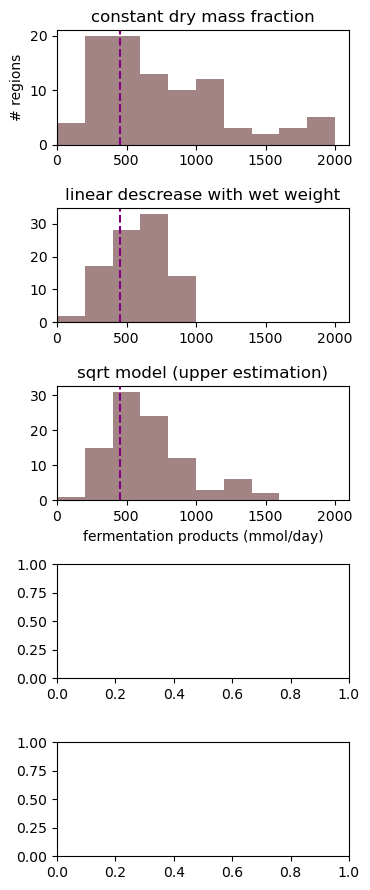

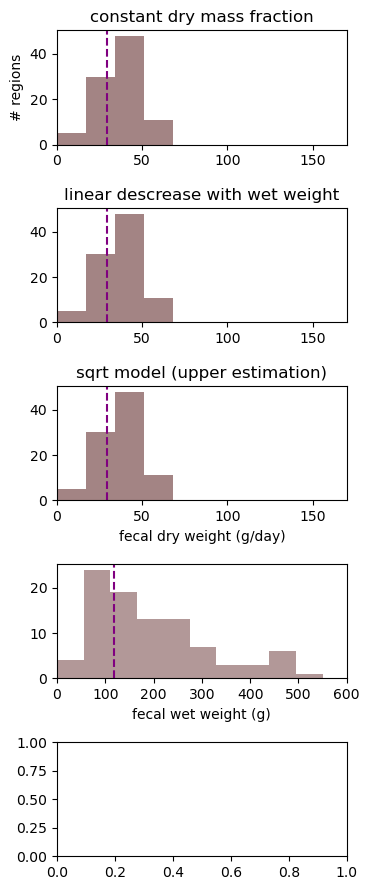

In [35]:

#for all other estimations of fecal dry weight from wet weight

fecaldryweight0=FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'])
fecaldryweight1=FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'])
fecaldryweight3=FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'])


energyBurkitfecalweight0,fermBurkittfecalweight0=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=0)*0.548,scenario='reference',calctype='from_feces',dict_yielddata=dict_yielddata)
energyBurkitfecalweight1,fermBurkittfecalweight1=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=1)*0.548,scenario='reference',calctype='from_feces',dict_yielddata=dict_yielddata)
#energyBurkitfecalweight2,fermBurkittfecalweight2=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=2)*0.548,scenario='reference',calctype='from_feces')
energyBurkitfecalweight3,fermBurkittfecalweight3=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=3)*0.548,scenario='reference',calctype='from_feces',dict_yielddata=dict_yielddata)
#energyBurkitfecalweight4,fermBurkittfecalweight4=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=4)*0.548,scenario='reference',calctype='from_feces')

fig, axs = plt.subplots(5,1, figsize=(3.8,5*1.8))
#axs=[axs]

fpmaxr=2000
axs[0].hist(fermBurkittfecalweight0,label='constant',color=colorBK,alpha=alphahis,range=(0,fpmaxr))
axs[0].set_title("constant dry mass fraction")
#axs[7].hist(energyBurkit,label='calc. from Burkitt et al (RS constant)',color='k',alpha=0.5,range=(0,200))
axs[1].hist(fermBurkittfecalweight1,color=colorBK,alpha=alphahis,range=(0,fpmaxr),label='lin fit')
axs[1].set_title("linear descrease with wet weight")
axs[2].set_title("sqrt model (upper estimation)")
axs[2].hist(fermBurkittfecalweight3,color=colorBK,alpha=alphahis,range=(0,fpmaxr),label='sqrt lin fit')
axs[2].set_xlabel("fermentation products (mmol/day)")
axs[0].set_ylabel("# regions")
axs[0].set_xlim(0,2100)
axs[1].set_xlim(0,2100)
axs[2].set_xlim(0,2100)

axs[0].axvline(BRD["FP_fromcarbs_standard"],ls='--',color=colorrefdiet,label='British ref. diet')
axs[1].axvline(BRD["FP_fromcarbs_standard"],ls='--',color=colorrefdiet,label='British ref. diet')
axs[2].axvline(BRD["FP_fromcarbs_standard"],ls='--',color=colorrefdiet,label='British ref. diet')

plt.tight_layout()
fig.savefig("plot_output_figure4/fecalconsiderations_Burkitt_diff_model_dwcontent.pdf")


fig, axs = plt.subplots(5,1, figsize=(3.8,5*1.8))

fpmaxr=170
axs[0].hist(fecaldryweight0,label='constant',color=colorBK,alpha=alphahis,range=(0,fpmaxr))
axs[0].set_title("constant dry mass fraction")
#axs[7].hist(energyBurkit,label='calc. from Burkitt et al (RS constant)',color='k',alpha=0.5,range=(0,200))
axs[1].hist(fecaldryweight1,color=colorBK,alpha=alphahis,range=(0,fpmaxr),label='lin fit')
axs[1].set_title("linear descrease with wet weight")
axs[2].set_title("sqrt model (upper estimation)")
axs[2].hist(fecaldryweight3,color=colorBK,alpha=alphahis,range=(0,fpmaxr),label='sqrt lin fit')
axs[2].set_xlabel("fecal dry weight (g/day)")
axs[0].set_ylabel("# regions")
axs[0].set_xlim(0,fpmaxr)
axs[1].set_xlim(0,fpmaxr)
axs[2].set_xlim(0,fpmaxr)

axs[0].axvline(BRD["fecaldrymass"],ls='--',color=colorrefdiet,label='British ref. diet')
axs[1].axvline(BRD["fecaldrymass"],ls='--',color=colorrefdiet,label='British ref. diet')
axs[2].axvline(BRD["fecaldrymass"],ls='--',color=colorrefdiet,label='British ref. diet')

axs[3].hist(Burkittdata['fecal weight'],density=False,bins=10,label='Burkitt et al',range=(0,550),color=colorBK,alpha=0.5)
axs[3].axvline(BRD["fecalwetmass"],ls='--',color=colorrefdiet,label='British ref. diet')
axs[3].set_xlabel("fecal wet weight (g)")
axs[3].set_xlim(0,600)

plt.tight_layout()
fig.savefig("plot_output_figure4/fecalconsiderations_Burkitt_diff_model_dwcontent_2.pdf")



# Plot distributions into one plot

Hadza mean
1


0.04804944603713973

[    month  fiber  protein  fat  carbohydrate  honey  carbLI_standard  \
0       1    101      124   49           326    103          72.6227   
1       2     74       64   43           400    367          52.5553   
2       3     78      105   41           363    193          62.1387   
3       4     24      103   49           347    402          24.3218   
4       5     45      119   50           330    281          38.9529   
5       6     66       98   39           375    233          56.2347   
6       7    102      129   41           340     16          81.2644   
7       8     88      183   72           216     51          57.3009   
8       9     52      243   89           118     27          32.8393   
9      10     93      194   77           194     31          57.7979   
10     11     94      129   36           350     11          79.9349   
11     12     90      101   32           387    120          75.1680   

    carbLI_lower  carbLI_higher  kcal  energy_standard  \
0   

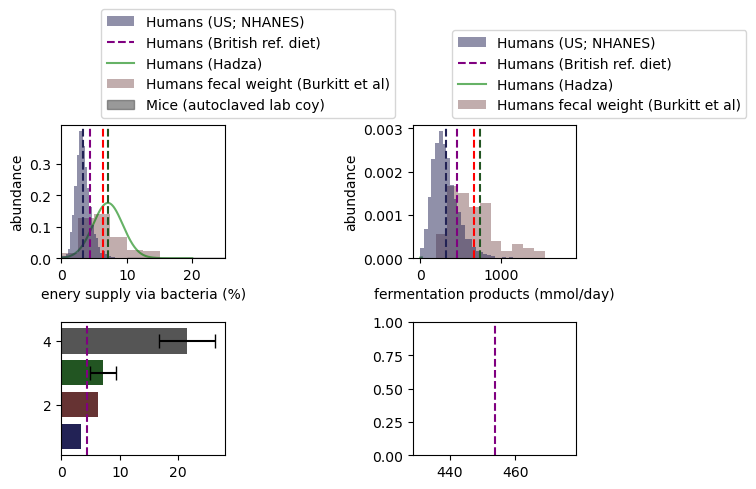

In [36]:
# all in one plot

fig, axs = plt.subplots(2,2, figsize=(2*3.5,2*2.5))

#%%%%%%%%%%%%%%%
#energy distribution
c=0
#start with NHANES data
axs[c,0].hist(perin["energyfracBE_standard"],bins=40,density=True,label='Humans (US; NHANES)',color=colorNHANES,alpha=0.5)
#axs[c].hist(perin["energyfracEonly"],bins=40,density=True,label='E.rectaly',color='r',alpha=0.5)
#axs[c].hist(perin["energyfracBE05"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
axs[c,0].set_xlabel(labelenergybacfrac)
axs[c,0].set_ylabel("abundance")
axs[c,0].axvline(perin['energyfracBE_standard'].mean(),ls='--',color=colorNHANES)

#add line reference diet
axs[c,0].axvline(BRD["energyfrac_fromcarbs_standard"]*100,ls='--',color=colorrefdiet, label='Humans (British ref. diet)')

#add hadza average
axs[c,0].axvline(hadzadiet_listfiberfraction[0]["energyfrac_standard"].mean(),ls='--',color=colorHadza)
#add gausian to illustrate Hadza
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
xrange=np.linspace(0,20,500)
axs[c,0].plot(xrange,gaussian(xrange,hazav,hazstd),color='green',alpha=alphahis,zorder=-3,label='Humans (Hadza)')
print("Hadza mean")
print(len(hadzadiet_listfiberfraction))

#add Burkitt estimation via fecal weight
axs[c,0].hist(energyratioBurkitfecalweight*100,label="Humans fecal weight (Burkitt et al)",density=True,zorder=-4,color=colorBK,alpha=0.4,range=(0,25))
axs[c,0].axvline(energyratioBurkitfecalweight.mean()*100,ls='--',color="r")

#mous daten
xrange2=np.linspace(10,30,500)


#energyfraction mice (by comparsion SFP and GF mice)
avmouse=MOUSE["energyfraction_from_microbiota"]
avmousestd=MOUSE["energyfractionSTD_from_microbiota"]

display(MOUSE["energyfractionSTD_from_microbiota"])



axs[c,0].fill_between(xrange2, gaussian(xrange2,avmouse,avmousestd), y2=0,color=colorMouse,alpha=alphahis,zorder=-3,label='Mice (autoclaved lab coy)')

#finish axes formating
axs[c,0].legend(bbox_to_anchor=(0.2, 1))
#axs[c].yaxis.set_major_formatter(PercentFormatter(1))
axs[c,0].set_xlim(0,25)
axs[c,0].set_yticks([0,0.1,0.2,0.3])

#%%%%%%%%%%%%%%%
#FP distribution

#start with NHANES data
axs[c,1].hist(perin["fermBE_standard"],bins=40,density=True,label='Humans (US; NHANES)',color=colorNHANES,alpha=0.5)
axs[c,1].set_xlabel("fermentation products (mmol/day)")
axs[c,1].set_ylabel("abundance")
axs[c,1].axvline(perin['fermBE_standard'].mean(),ls='--',color=colorNHANES)

#add line reference diet
axs[c,1].axvline(BRD["FP_fromcarbs_standard"],ls='--',color=colorrefdiet, label='Humans (British ref. diet)')

print(hadzadiet_listfiberfraction)
#add hadza average
axs[c,1].axvline(hadzadiet_listfiberfraction[0]["fermentationprod_standard"].mean(),ls='--',color=colorHadza)
#add gausian to illustrate Hadza
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
xrange=np.linspace(0,20,500)

hazavFP=hadzadiet_listfiberfraction[0]["fermentationprod_standard"].mean()
hazstdFP=hadzadiet_listfiberfraction[0]["fermentationprod_standard"].std()
print(hazavFP)
    
axs[c,1].plot(xrange,gaussian(xrange,hazavFP,hazstdFP),color='green',alpha=alphahis,zorder=-3,label='Humans (Hadza)')

#add Burkitt estimation via fecal weight
axs[c,1].hist(fermBurkittfecalweight,label="Humans fecal weight (Burkitt et al)",density=True,zorder=-4,color=colorBK,alpha=0.4)
axs[c,1].axvline(fermBurkittfecalweight.mean(),ls='--',color="r")

#mouse data
xrange2=np.linspace(10,30,500)
#finish axes formating
axs[c,1].legend(bbox_to_anchor=(0.2, 1))

######################
#plotbox diagrams
######################

#US
c=1

#xrange
xrange2=np.linspace(10,30,500)
#average fecal weight (4 SFP ice): 0.82 g/day. Variation in mass 0.089. Relative variation: 0.089/0.82=0.108
#axs[c].fill_between(xrange2, gaussian(xrange2,avmouse,avmousestd), y2=0,color='gray',alpha=0.4,zorder=-3,label='Mice (autoclaved lab coy)')

#mouse points, take 4 different fecal weights and calculate difference to average
#datamouse=np.array([0.871165644,1.055214724,1.116564417,0.957055215])*avmouse

#or draw from gaussian distribution
#random.normal(loc=avmouse,scale=avmousestd,size=300)


#bplot1=axs[0].boxplot(databox,labels=["Burkitt"],vert=False,showfliers=False, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

cs=5
axs[c,0].barh(1,perin["energyfracBE_standard"].mean(),label="Humans  (US - NHANES)",color=colorNHANES)
axs[c,0].barh(3,hadzadiet_listfiberfraction[0]["energyfrac_standard"].mean(),xerr=hadzadiet_listfiberfraction[0]["energyfrac_standard"].std(),label="Humans (Hadza)",color=colorHadza,capsize=cs)
axs[c,0].barh(2,energyratioBurkitfecalweight.mean()*100,label="Humans global (Burkitt et al)$^*$",color=colorBK)
axs[c,0].barh(4,avmouse*100,label="Mice (autoclaved lab coy)",xerr=avmousestd*100,color=colorMouse,capsize=cs)

print(avmousestd)

print("NHAND ENERGY FRAC")
print(perin["energyfracBE_standard"])
print(hadzadiet_listfiberfraction[0]["energyfrac_standard"])
#print(erin["energyfracBE_standard"])
#print(erin["energyfracBE_standard"])

#axs[c,0].barh([[perin["energyfracBE_standard"],hadzadiet_listfiberfraction[0]["energyfrac_standard"],energyratioBurkitfecalweight*100]],[1,2,3,4],patch_artist=True,labels=["Humans  (US - NHANES)","Humans Hadza","Humans global (Burkitt et al.)$^*$"],vert=False,showfliers=False, widths=[0.7]*4)#,"Mice (autoclaved lab coy)"])
#axs[c,0].barh([[perin["energyfracBE_standard"],hadzadiet_listfiberfraction[0]["energyfrac_standard"],energyratioBurkitfecalweight*100]],[1,2,3,4],patch_artist=True,labels=["Humans  (US - NHANES)","Humans Hadza","Humans global (Burkitt et al.)$^*$"],vert=False,showfliers=False, widths=[0.7]*4)#,"Mice (autoclaved lab coy)"])
#axs[c,0].barh([[perin["energyfracBE_standard"],hadzadiet_listfiberfraction[0]["energyfrac_standard"],energyratioBurkitfecalweight*100]],[1,2,3,4],patch_artist=True,labels=["Humans  (US - NHANES)","Humans Hadza","Humans global (Burkitt et al.)$^*$"],vert=False,showfliers=False, widths=[0.7]*4)#,"Mice (autoclaved lab coy)"])

#,datamouse

#"Mice (autocalved chow)"
#axs[c,0].hbar([perin["energyfracBE_standard"],hadzadiet_listfiberfraction[0]["energyfrac_standard"],energyratioBurkitfecalweight*100,datamouse],patch_artist=True,labels=["Humans  (US - NHANES)","Humans Hadza","Humans global (Burkitt et al.)$^*$","Mice (autocalved chow)"],vert=False,showfliers=False, widths=[0.7]*4)#,"Mice (autoclaved lab coy)"])


axs[c,0].axvline(BRD["energyfrac_fromcarbs_standard"]*100,ls='--',color=colorrefdiet, label='Humans (British ref. diet)')
# fill with colors
colors = [colorNHANES, colorHadza, colorBK,colorMouse]

#for patch, color in zip(bplot1['boxes'], colors):
#        patch.set_facecolor(color)
axs[c,0].set_xlim(0,28)

#axs[c].axvspan(4.048716042694848,13.870522981900136,color='green',alpha=0.3,zorder=-2,label='Humans (Hadza)')
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
xrange=np.linspace(0,20,500)

#xrange
xrange2=np.linspace(10,30,500)

#avmouse=18.9 #average of 17.6 + 20.2
#avmousestd=avmouse*0.108 #estimation of variation via variation of fecal weight, assuming energy intake is not changing much
#datamouse=np.array([0.871165644,1.055214724,1.116564417,0.957055215])*avmouse
#bplot1=axs[c,1].boxplot([perin["fermBE_standard"],hadzadiet_listfiberfraction[0]["fermentationprod_standard"],fermBurkittfecalweight],patch_artist=True,labels=["Humans  (US - NHANES)","Humans Hadza","Humans global (Burkitt et al.)$^*$"],vert=False,showfliers=False, widths=[0.7]*3)#,"Mice (autoclaved lab coy)"])

#axs[c,1].boxh([perin["fermBE_standard"],hadzadiet_listfiberfraction[0]["fermentationprod_standard"]],[1,2,3,4]]fermBurkittfecalweight],patch_artist=True,labels=["Humans  (US - NHANES)","Humans Hadza","Humans global (Burkitt et al.)$^*$"],vert=False,showfliers=False, widths=[0.7]*3)#,"Mice (autoclaved lab coy)"])

axs[c,1].axvline(BRD["FP_fromcarbs_standard"],ls='--',color=colorrefdiet, label='Humans (British ref. diet)')
# fill with colors
colors = [colorNHANES, colorHadza, colorBK,colorMouse]
#for patch, color in zip(bplot1['boxes'], colors):
#        patch.set_facecolor(color)

plt.tight_layout()
plt.savefig("plot_output_figure5/energycontribution_summary.pdf")

In [37]:
# Basic considerations of ATP yield

Hadza mean
1


0.04804944603713973

732.5828568084562


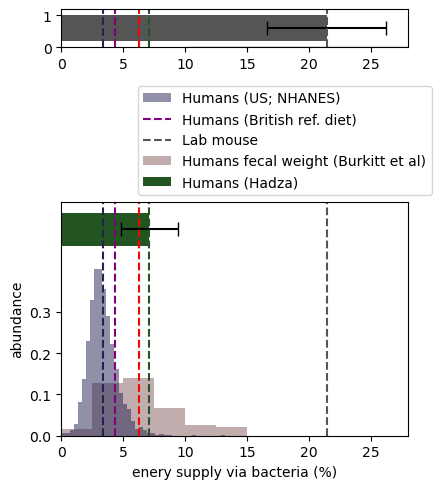

In [38]:
# all in one plot

fig, axs = plt.subplots(2,figsize=(4.5,2*2.5),gridspec_kw={'height_ratios': [0.49, 3]})


#%%%%%%%%%%%%%%%
#energy distribution
c=0
#start with NHANES data
axs[1].hist(perin["energyfracBE_standard"],bins=40,density=True,label='Humans (US; NHANES)',color=colorNHANES,alpha=0.5)
#axs[c].hist(perin["energyfracEonly"],bins=40,density=True,label='E.rectaly',color='r',alpha=0.5)
#axs[c].hist(perin["energyfracBE05"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
axs[1].set_xlabel(labelenergybacfrac)
axs[1].set_ylabel("abundance")
axs[1].axvline(perin['energyfracBE_standard'].mean(),ls='--',color=colorNHANES)
axs[0].axvline(perin['energyfracBE_standard'].mean(),ls='--',color=colorNHANES)

cs=5
axs[1].barh(0.5,hadzadiet_listfiberfraction[0]["energyfrac_standard"].mean(),height=0.08,xerr=hadzadiet_listfiberfraction[0]["energyfrac_standard"].std(),label="Humans (Hadza)",color=colorHadza,capsize=cs)
axs[0].barh(.6,avmouse*100,label="Mice (autoclaved lab coy)",height=0.8,xerr=avmousestd*100,color=colorMouse,capsize=cs)

axs[0].set_ylim(0,1.2)


#add line reference diet
axs[1].axvline(BRD["energyfrac_fromcarbs_standard"]*100,ls='--',color=colorrefdiet, label='Humans (British ref. diet)')
axs[1].axvline(avmouse*100,ls='--',color=colorMouse, label='Lab mouse')
axs[0].axvline(BRD["energyfrac_fromcarbs_standard"]*100,ls='--',color=colorrefdiet, label='Humans (British ref. diet)')
axs[0].axvline(avmouse*100,ls='--',color=colorMouse, label='Lab mouse')

#add hadza average
axs[1].axvline(hadzadiet_listfiberfraction[0]["energyfrac_standard"].mean(),ls='--',color=colorHadza)
axs[0].axvline(hadzadiet_listfiberfraction[0]["energyfrac_standard"].mean(),ls='--',color=colorHadza)

print("Hadza mean")
print(len(hadzadiet_listfiberfraction))


#add Burkitt estimation via fecal weight
axs[1].hist(energyratioBurkitfecalweight*100,label="Humans fecal weight (Burkitt et al)",density=True,zorder=-4,color=colorBK,alpha=0.4,range=(0,25))
axs[1].axvline(energyratioBurkitfecalweight.mean()*100,ls='--',color="r")
axs[0].axvline(energyratioBurkitfecalweight.mean()*100,ls='--',color="r")

#mous daten
xrange2=np.linspace(10,30,500)


#energyfraction mice (by comparsion SFP and GF mice)
avmouse=MOUSE["energyfraction_from_microbiota"]
avmousestd=MOUSE["energyfractionSTD_from_microbiota"]

display(MOUSE["energyfractionSTD_from_microbiota"])



axs[0].fill_between(xrange2, gaussian(xrange2,avmouse,avmousestd), y2=0,color=colorMouse,alpha=0.4,zorder=-3,label='Mice (autoclaved lab coy)')

#finish axes formating
axs[1].legend(bbox_to_anchor=(0.2, 1))
#axs[c].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_xlim(0,28)
axs[0].set_xlim(0,28)
axs[1].set_yticks([0,0.1,0.2,0.3])

hazavFP=hadzadiet_listfiberfraction[0]["fermentationprod_standard"].mean()
hazstdFP=hadzadiet_listfiberfraction[0]["fermentationprod_standard"].std()
print(hazavFP)

plt.tight_layout()
plt.savefig("plot_output_figure5/energycontribution_summary.pdf")